# From cosmology to linear power parameters

In [1]:
%matplotlib inline
import numpy as np
import os
## Set default plot size, as normally its a bit too small
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 150
mpl.rcParams['figure.dpi'] = 150
import camb
from camb import model, initialpower
import fit_pk as fit

### Specify cosmological model

In [2]:
pars = fit.get_cosmology(mnu=0.3)

### Run CAMB to get power spectrum

In [5]:
## output redshifts
#zs=[2,5,99,1000]
zs=[2,3,4]
Nz=len(zs)
#k_hMpc, zs_out, P_hMpc = fit.get_Plin_hMpc(pars,zs)
k_Mpc, zs_out, P_Mpc = fit.get_Plin_Mpc(pars,zs)

Note: redshifts have been re-sorted (earliest first)


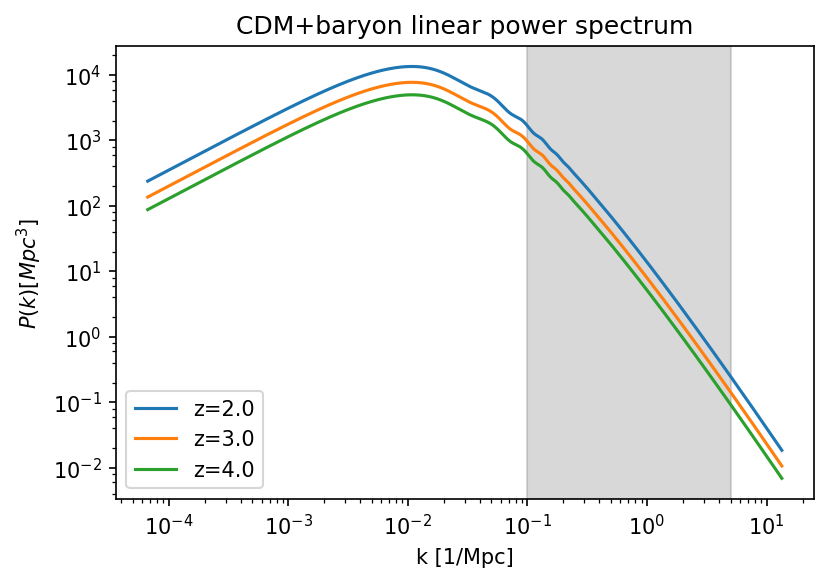

In [6]:
plt.figure()
for iz in range(Nz): 
    plt.loglog(k_Mpc,P_Mpc[iz],label='z='+str(zs_out[iz]))
plt.title(r"CDM+baryon linear power spectrum")
plt.xlabel("k [1/Mpc]")
plt.ylabel(r"$P(k) [Mpc^3]$")
plt.legend()
plt.axvspan(0.1,5.0,alpha=0.3, color='gray')

### Compute ratio with respect to default cosmology

Start by computing the power in the default cosmology

In [7]:
pars_def = fit.get_cosmology(mnu=0.0)
#k_hMpc_def, _, P_hMpc_def = fit.get_Plin_hMpc(pars_def,zs=zs)
k_Mpc_def, _, P_Mpc_def = fit.get_Plin_Mpc(pars_def,zs=zs)

Note: redshifts have been re-sorted (earliest first)


In [8]:
fit.print_info(pars)
fit.print_info(pars_def)

h = 0.67 ; Omega_b h^2 = 0.022 ; Omega_c h^2 = 0.12 ; Omega_k = 0.0 ; ommnuh2 = 0.00322 ; A_s = 2.1e-09 ; n_s = 0.96
h = 0.67 ; Omega_b h^2 = 0.022 ; Omega_c h^2 = 0.12 ; Omega_k = 0.0 ; ommnuh2 = 0.0 ; A_s = 2.1e-09 ; n_s = 0.96


In case the wavenumbers are not the same, interpolate the default cosmology to the same wavenumber

In [9]:
Nk = len(k_Mpc)
P_ratio_Mpc = np.empty([Nz,Nk])
for iz in range(Nz):
    P_ratio_Mpc[iz] = P_Mpc[iz] / np.interp(k_Mpc,k_Mpc_def,P_Mpc_def[iz])

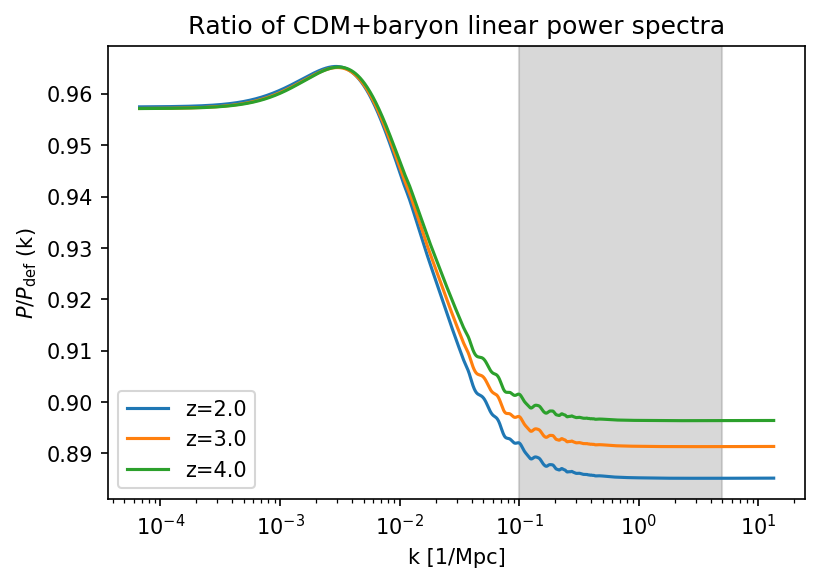

In [10]:
Nz=len(zs_out)
plt.figure()
for iz in range(Nz): 
    plt.semilogx(k_Mpc,P_ratio_Mpc[iz],label='z='+str(zs_out[iz]))
plt.title(r"Ratio of CDM+baryon linear power spectra")
plt.xlabel("k [1/Mpc]")
plt.ylabel(r"$P/P_{\rm def}$ (k)")
plt.legend()
plt.axvspan(0.1,5.0,alpha=0.3, color='gray')

In [11]:
def fit_polynomial(xmin,xmax,x,y,deg=2):
    x_fit= (x > xmin) & (x < xmax)
    poly=np.polyfit(np.log(x[x_fit]), np.log(y[x_fit]), deg=deg)
    return np.poly1d(poly)

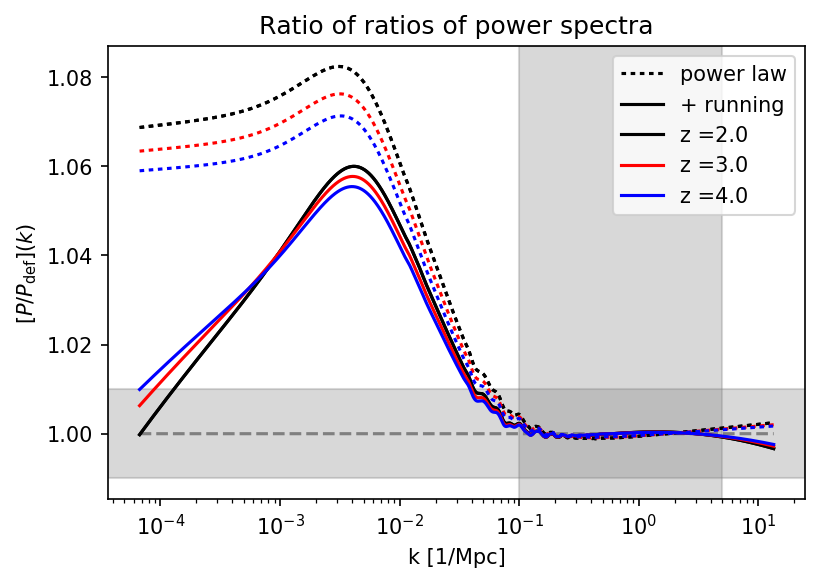

In [25]:
# use a certain k range to fit
k_fit_min=0.1
k_fit_max=5.0
colors=['black','red','blue']
plt.figure()
plt.semilogx(k_Mpc,np.ones_like(k_Mpc),'--',color='gray')
for iz in range(Nz):
    poly_deg1=fit_polynomial(k_fit_min,k_fit_max,k_Mpc,P_ratio_Mpc[iz],deg=1)
    poly_deg2=fit_polynomial(k_fit_min,k_fit_max,k_Mpc,P_ratio_Mpc[iz],deg=2)

    if iz is 0:
        plt.semilogx(k_Mpc,P_ratio_Mpc[iz]/np.exp(poly_deg1(np.log(k_Mpc))),':',color=colors[iz],label='power law')
        plt.semilogx(k_Mpc,P_ratio_Mpc[iz]/np.exp(poly_deg2(np.log(k_Mpc))),'-',color=colors[iz],label='+ running')
    plt.semilogx(k_Mpc,P_ratio_Mpc[iz]/np.exp(poly_deg1(np.log(k_Mpc))),':',color=colors[iz])
    plt.semilogx(k_Mpc,P_ratio_Mpc[iz]/np.exp(poly_deg2(np.log(k_Mpc))),'-',color=colors[iz],label='z ='+str(zs_out[iz]))
        
plt.title("Ratio of ratios of power spectra")
#(z="+str(zs[iz])+")")
plt.xlabel("k [1/Mpc]")
plt.ylabel(r"$[P/P_{\rm def}](k)$")
plt.axvspan(k_fit_min,k_fit_max,alpha=0.3, color='gray')
plt.axhspan(0.99,1.01,alpha=0.3, color='gray')
plt.legend()